#**Ejercicio**

Recibir una imagen normal, una con ruido y la misma con otro ruido de magnitud diferente.

Salida que detecte la clase del objeto, genero de la imagen

Esa segunda salida se debe crear con base a su propio criterio

## Arquitectura Secuencial

In [41]:
# Importamos librerías necesarias
import tensorflow as tf # Librería para redes neuronales
from tensorflow import keras # Dataset de imágenes de prendas
import matplotlib.pyplot as plt
import numpy as np

In [42]:
fashion_mnist = keras.datasets.fashion_mnist # Cargamos el Dataset de fashion mnist (prendas)
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() # Dividimos el Dataset para entrenamiento y para test

In [43]:
# Obtenemos las dimensiones de Train
x_train_shape = X_train_full.shape
y_train_shape = y_train_full.shape

# Obtenemos las dimensiones de Test
x_test_shape = X_test.shape
y_test_shape = y_test.shape

print("Las dimensiones de entrenamiento en X son: ",x_train_shape)
print("Las dimensiones de entrenamiento en y son: ",y_train_shape)

print("Las dimensiones de test en X son: ",x_test_shape)
print("Las dimensiones de test en y son: ",y_test_shape)

Las dimensiones de entrenamiento en X son:  (60000, 28, 28)
Las dimensiones de entrenamiento en y son:  (60000,)
Las dimensiones de test en X son:  (10000, 28, 28)
Las dimensiones de test en y son:  (10000,)


In [44]:
# Dividimos nuestro entrenamiento en las primeras 5000 para validación y el resto para entrenamiento
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #  Normalizamos -> Tener la imágen entre 0 y 1 los px
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Normalizamos las imágenes de Test -> Tener la imágen entre 0 y 1 los px
X_test = X_test / 255.

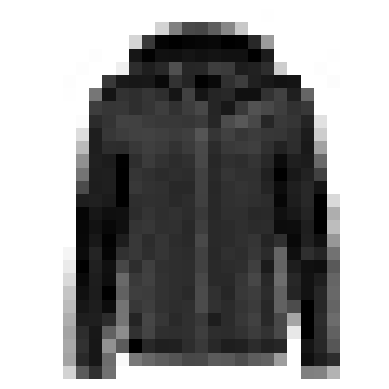

In [45]:
# Graficamos la imagen 0 para hacer una prueba
plt.imshow(X_train[0], cmap="binary") # cmap="binary" -> Para ver la imagen en escala de grises
plt.axis('off')
plt.show()

In [46]:
# Definimos un vector con los nombres de las prendas
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

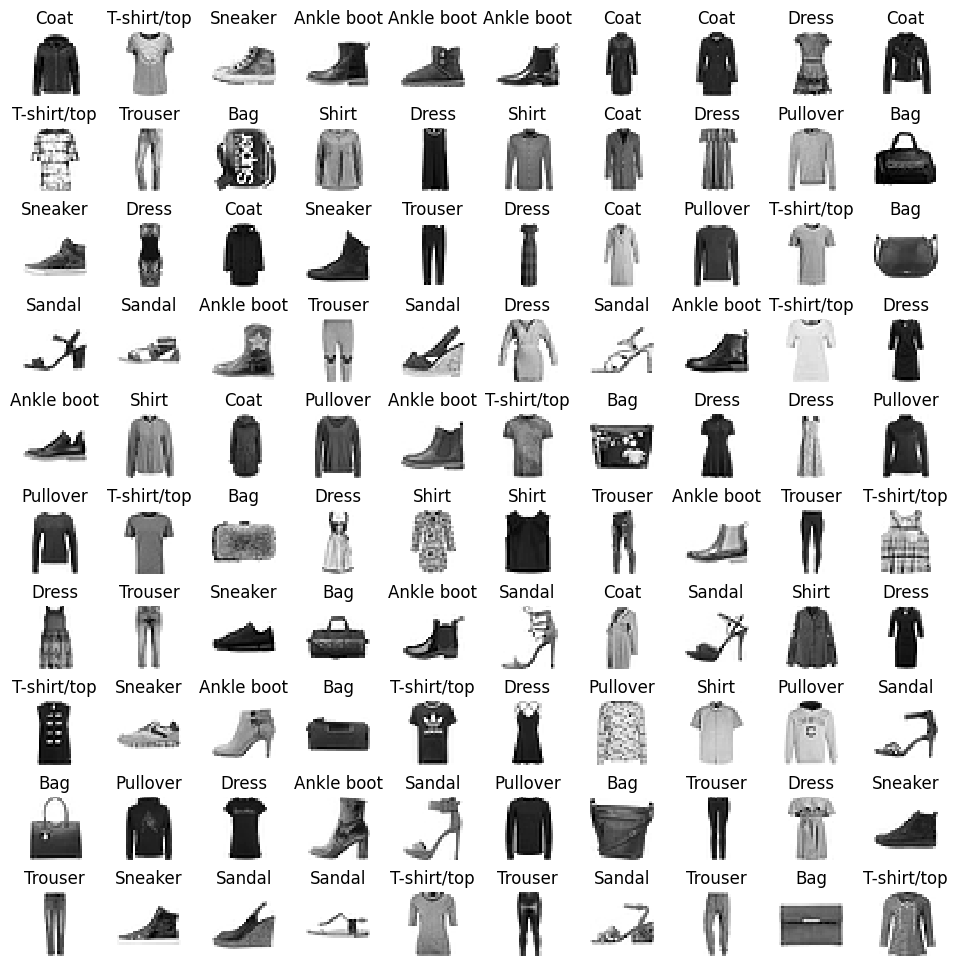

In [47]:
n_rows = 10
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [48]:
def apply_noise_to_image(image, noise_factor):
  '''
  Aplica ruido gaussiano a una imagen.

  Param:
    - image: numpy.ndarray, la imagen original.
    - noise_factor: float, el factor de ruido para controlar la cantidad de ruido.

  Returns:
    - noisy_image: numpy.ndarray, la imagen con ruido aplicado.
  '''

  noisy_image = image + noise_factor * np.random.normal(size=image.shape)
  noisy_image = np.clip(noisy_image, 0.0, 1.0)  # Asegura de normalizar la imagen
  return noisy_image

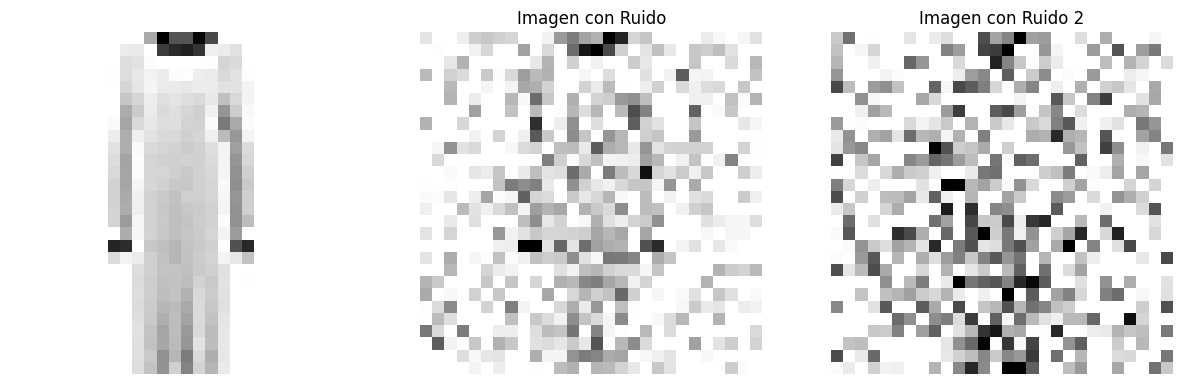

In [126]:
# Elegir una imagen al azar del conjunto de prueba
random_index = np.random.randint(0, len(X_test))
sample_image = X_test[random_index]

# Imagen con ruido 1
noise = 0.2
noisy_image = apply_noise_to_image(sample_image,noise)

# Imagen con ruido 2
noise_2 = 0.4
noisy_image_2 = apply_noise_to_image(sample_image,noise_2)


# Mostrar la imagen original
plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.imshow(sample_image, cmap='binary')
plt.axis('off')

# Mostrar la imagen con ruido 1
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='binary')
plt.title('Imagen con Ruido')
plt.axis('off')

# Mostrar la imagen con ruido 2
plt.subplot(1, 3, 3)
plt.imshow(noisy_image_2, cmap='binary')
plt.title('Imagen con Ruido 2')
plt.axis('off')

plt.show()

In [50]:
# Crear un modelo de red neuronal
model = keras.models.Sequential([
    keras.layers.Input(shape=(sample_image.shape[0],sample_image.shape[1]), name='entrada'),
    keras.layers.Flatten(input_shape=(sample_image.shape[0], sample_image.shape[1]), name='Flatten'),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax", name='Salida') # Salida del modelo que debe ir con 10 neuronas que son el número de clases que tengo

])

In [54]:
# Compilar el modelo
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [55]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=64,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 4s 4ms/step - loss: 0.8598 - accuracy: 0.7313 - val_loss: 0.5867 - val_accuracy: 0.8120
Epoch 2/30
860/860 [==============================] - 3s 3ms/step - loss: 0.5498 - accuracy: 0.8144 - val_loss: 0.5187 - val_accuracy: 0.8242
Epoch 3/30
860/860 [==============================] - ETA: 0s - loss: 0.4941 - accuracy: 0.8291

KeyboardInterrupt: ignored

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 300)               235500    
                                                                 
 dense_15 (Dense)            (None, 100)               30100     
                                                                 
 Salida (Dense)              (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


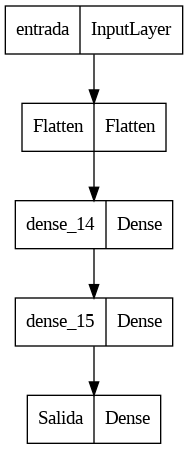

In [56]:
# Revisamos la arquitectura del modelo
model.summary()
tf.keras.utils.plot_model(model)

1/1 [==============================] - 0s 76ms/step


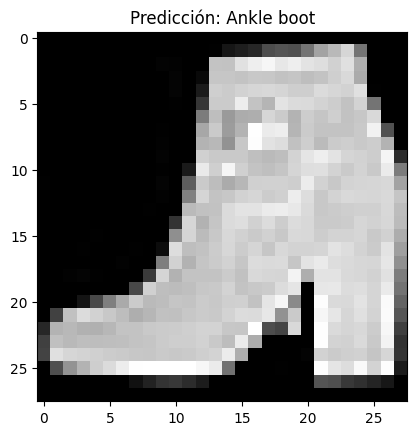

In [57]:
# Realizar la predicción
predicted_probs = model.predict(np.array([sample_image]))
predicted_class = np.argmax(predicted_probs)
predicted_class_name = class_names[predicted_class]

# Mostrar la imagen
plt.figure()
plt.imshow(sample_image, cmap='gray')
plt.title(f'Predicción: {predicted_class_name}')
plt.show()

In [58]:
# Crear una función que determine el género
def get_gender(class_name, gender_classes):
  return "Hombre" if class_name in gender_classes else "Mujer"

1/1 [==============================] - 0s 23ms/step


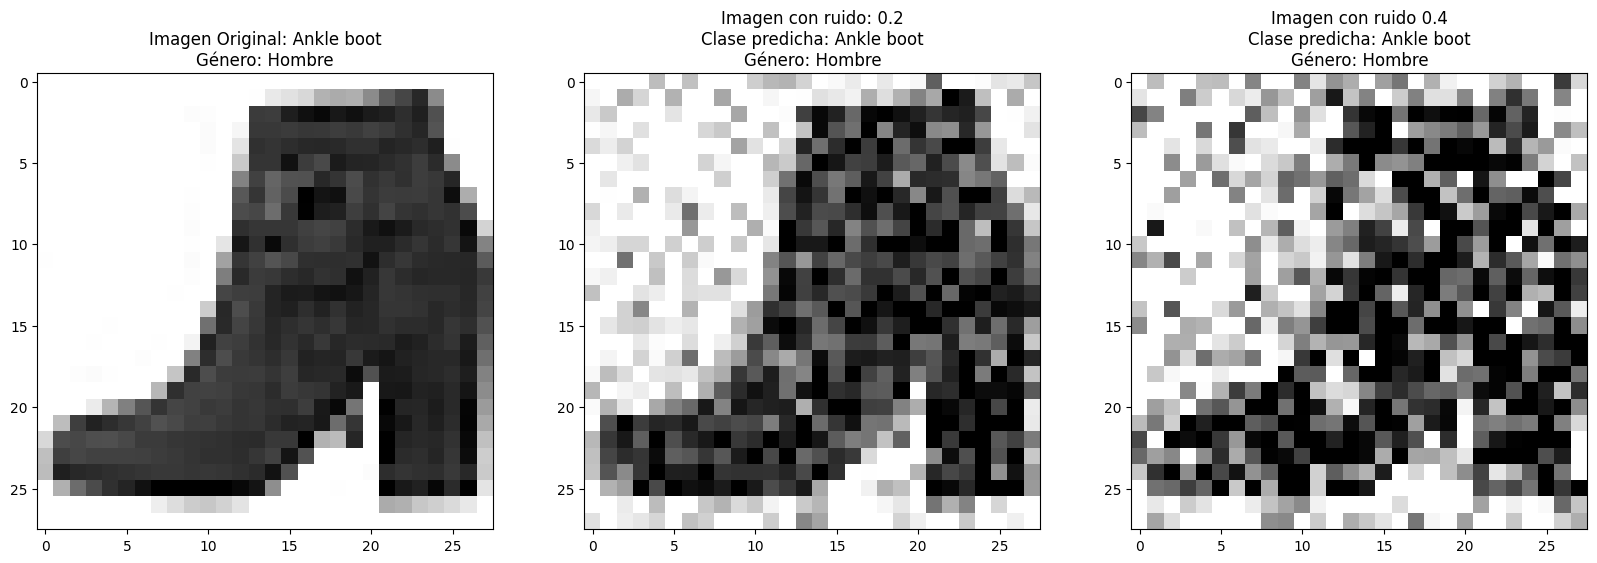

In [59]:
# Clases de hombre (T-shirt/top, Trouser, Pullover, Coat, Ankle boot)
men_classes = ["T-shirt/top", "Trouser", "Pullover", "Coat", "Ankle boot"]

# Predicción imagen original
predicted_probs = model.predict(np.array([sample_image]))
predicted_class = np.argmax(predicted_probs)
predicted_class_name = class_names[predicted_class]

# Predicción imagen con ruido 1 (beta = 0.2)
predicted_probs_1 = model.predict(np.array([noisy_image]))
predicted_class_1 = np.argmax(predicted_probs_1)
predicted_class_name_1 = class_names[predicted_class_1]

# Predicción imagen con ruido 2 (beta = 0.4)
predicted_probs_2 = model.predict(np.array([noisy_image_2]))
predicted_class_2 = np.argmax(predicted_probs_2)
predicted_class_name_2 = class_names[predicted_class_2]


# Obtener el género para cada imagen
gender_1 = get_gender(predicted_class_name, men_classes)
gender_2 = get_gender(predicted_class_name_1, men_classes)
gender_3 = get_gender(predicted_class_name_2, men_classes)

# Mostrar los resultados
plt.figure(figsize=(20, 6))

# Gráfica Imagen original
plt.subplot(1, 3, 1)
plt.imshow(sample_image, cmap='binary')  # Muestra la imagen original
plt.title(f'Imagen Original: {predicted_class_name}\nGénero: {gender_1}')

# Gráfica Imagen con ruido 1
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='binary')
plt.title(f'Imagen con ruido: {noise}\nClase predicha: {predicted_class_name_1}\nGénero: {gender_2}')

# Gráfica Imagen con ruido 2
plt.subplot(1, 3, 3)
plt.imshow(noisy_image_2, cmap='binary')
plt.title(f'Imagen con ruido {noise_2}\nClase predicha: {predicted_class_name_2}\nGénero: {gender_3}')

plt.show()

## Arquitectura funcional

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 entrada (InputLayer)        [(None, 28, 28)]             0         []                            
                                                                                                  
 entrada2 (InputLayer)       [(None, 28, 28)]             0         []                            
                                                                                                  
 entrada3 (InputLayer)       [(None, 28, 28)]             0         []                            
                                                                                                  
 Flatten (Flatten)           (None, 784)                  0         ['entrada[0][0]']             
                                                                                           

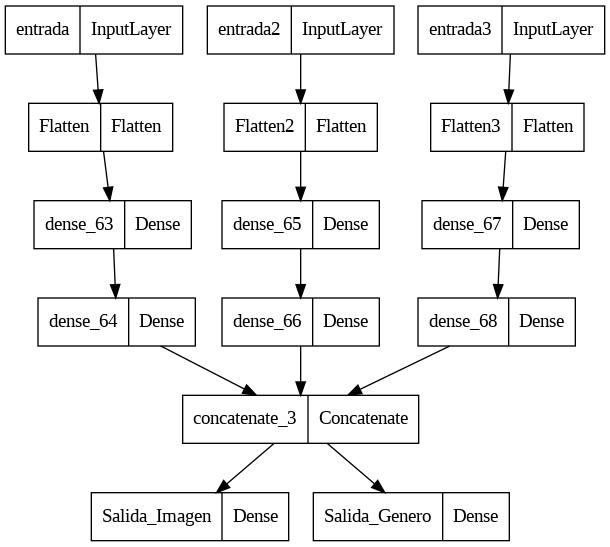

In [117]:
# Definir las entradas
#input_shape =
entrada = keras.layers.Input(shape=(sample_image.shape[0], sample_image.shape[1]), name='entrada')
entrada2 = keras.layers.Input(shape=(sample_image.shape[0], sample_image.shape[1]), name='entrada2')

entrada3= keras.layers.Input(shape=(sample_image.shape[0], sample_image.shape[1]), name='entrada3')

# Capa para la predicción de la imagen
x = keras.layers.Flatten(name='Flatten')(entrada)
x = keras.layers.Dense(300, activation="relu")(x)
x = keras.layers.Dense(100, activation="relu")(x)

# Capa para predecir género
y1= keras.layers.Flatten(name='Flatten2')(entrada2)
y1=keras.layers.Dense(300, activation="relu")(y1)
y1=keras.layers.Dense(100, activation="relu")(y1)
y2= keras.layers.Flatten(name='Flatten3')(entrada3)
y2=keras.layers.Dense(300, activation="relu")(y2)
y2=keras.layers.Dense(100, activation="relu")(y2)
y = keras.layers.Concatenate()([x,y1,y2]) # Puedes ajustar el número de neuronas según tus necesidades
genero_output = keras.layers.Dense(1, activation="sigmoid", name='Salida_Genero')(y)

imagen_output = keras.layers.Dense(10, activation="softmax", name='Salida_Imagen')(y)
# Crear el modelo funcional
model = keras.models.Model(inputs=[entrada,entrada2,entrada3], outputs=[imagen_output, genero_output])

# Compilar el modelo
model.compile(optimizer='adam',
              loss={'Salida_Imagen': 'sparse_categorical_crossentropy', 'Salida_Genero': 'binary_crossentropy'},
              metrics={'Salida_Imagen': 'accuracy', 'Salida_Genero': 'accuracy'})

# Resumen del modelo
model.summary()

tf.keras.utils.plot_model(model)

In [118]:
# Para testeo
X_test2=X_test.copy()
X_test2[X_test==0] = 0
X_test2[X_test==1] = 0
X_test2[X_test==2] = 0
X_test2[X_test==3] = 1
X_test2[X_test==4] = 0
X_test2[X_test==5] = 1
X_test2[X_test==6] = 1
X_test2[X_test==7] = 0
X_test2[X_test==8] = 1
X_test2[X_test==9] = 1

y_test2=y_test.copy()
y_test2[y_test==0] = 0
y_test2[y_test==1] = 0
y_test2[y_test==2] = 0
y_test2[y_test==3] = 1
y_test2[y_test==4] = 0
y_test2[y_test==5] = 1
y_test2[y_test==6] = 1
y_test2[y_test==7] = 0
y_test2[y_test==8] = 1
y_test2[y_test==9] = 1

# Para validación
X_valid2=X_valid.copy()
X_valid2[X_valid==0] = 0
X_valid2[X_valid==1] = 0
X_valid2[X_valid==2] = 0
X_valid2[X_valid==3] = 1
X_valid2[X_valid==4] = 0
X_valid2[X_valid==5] = 1
X_valid2[X_valid==6] = 1
X_valid2[X_valid==7] = 0
X_valid2[X_valid==8] = 1
X_valid2[X_valid==9] = 1

y_valid2=y_valid.copy()
y_valid2[y_valid==0] = 0
y_valid2[y_valid==1] = 0
y_valid2[y_valid==2] = 0
y_valid2[y_valid==3] = 1
y_valid2[y_valid==4] = 0
y_valid2[y_valid==5] = 1
y_valid2[y_valid==6] = 1
y_valid2[y_valid==7] = 0
y_valid2[y_valid==8] = 1
y_valid2[y_valid==9] = 1

In [119]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [120]:
X_test[X_test == 0]

array([0., 0., 0., ..., 0., 0., 0.])

In [121]:
X_test.shape

(10000, 28, 28)

In [122]:
X_test2.shape

(10000, 28, 28)

In [124]:
X_test.shape,y_test2.shape
X_test2=X_test+0.1
X_test3=X_test+0.9

In [125]:
model.fit([X_test,X_test2,X_test3],[y_test,y_test2],epochs=50,validation_data=([X_valid,X_valid2,X_valid3], [y_valid,y_valid2]))

Epoch 1/50
309/313 [============================>.] - ETA: 0s - loss: 1.1343 - Salida_Imagen_loss: 0.7415 - Salida_Genero_loss: 0.3928 - Salida_Imagen_accuracy: 0.7374 - Salida_Genero_accuracy: 0.8162

ValueError: ignored

Para este paso